In [1]:
from IPython.display import Markdown as md
from IPython.display import display, HTML
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
from pathlib import Path
from datetime import datetime
from recopytex import flat_df_students, pp_q_scores
#import prettytable as pt
%matplotlib inline

In [2]:
cm = sns.light_palette("green", as_cmap=True)

In [3]:
tribe = "308"
assessment = "DM1"
date = "15/09/16"
csv_file = Path(f"../sheets/{tribe}/160915_{assessment}.csv")

In [4]:
if date is None:
    display(md(f"# {assessment} pour {tribe}"))
else:
    display(md(f"# {assessment} ({date}) pour {tribe}"))

# DM1 (15/09/16) pour 308

In [32]:
stack_scores = pd.read_csv(csv_file, encoding="latin_1")
scores = flat_df_students(stack_scores).dropna(subset=["Score"])
scores = pp_q_scores(scores)
scores.head()

Trimestre  Nom      Date Exercice Question Competence Domaine Commentaire  \
0          1  DM1  15/09/16        1      1.1        Cal    Prio               
1          1  DM1  15/09/16        1      1.2        Cal    Prio               
2          1  DM1  15/09/16        1      1.3        Cal    Prio               
3          1  DM1  15/09/16        1      1.4        Cal    Prio               
4          1  DM1  15/09/16        1      1.5        Cal    Prio               

   Bareme  Est_nivele           Eleve  Score  Note  Niveau  Normalise  
0     1.0           1  ABDOU Asmahane    2.0   1.0     2.0        1.0  
1     1.0           1  ABDOU Asmahane    3.0   1.0     3.0        1.0  
2     1.0           1  ABDOU Asmahane    2.0   1.0     2.0        1.0  
3     1.0           1  ABDOU Asmahane    2.0   1.0     2.0        1.0  
4     1.0           1  ABDOU Asmahane    2.0   1.0     2.0        1.0

In [6]:
exercises_scores = scores.groupby(["Exercice", "Eleve"]).agg({"Note": "sum", "Bareme": "sum"})
exercises_scores.head()

Note  Bareme
Exercice Eleve                                 
1        ABDOU Asmahane             5.0     6.0
         ABOU Roihim                0.0     6.0
         AHMED BOINALI Kouraichia   2.0     6.0
         AHMED Rahada               3.0     6.0
         ALI SAID Anchourati        0.0     6.0

In [7]:
assessment_scores = scores.groupby(["Eleve"]).agg({"Note": "sum", "Bareme": "sum"})
#assessment_scores.style.background_gradient(cmap=cm, subset=["Note"])
assessment_scores.style.bar(subset=["Note"])

In [8]:
assessment_scores.Bareme.max()

12.0

In [9]:
assessment_scores["Note"].describe()

count    23.00
mean      5.37
std       3.08
min       0.00
25%       3.75
50%       6.50
75%       7.75
max       8.50
Name: Note, dtype: float64

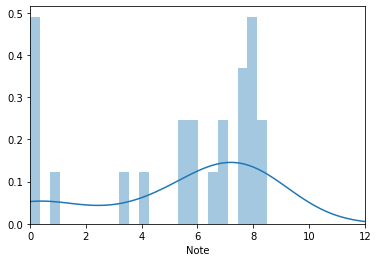

In [10]:
dp = sns.distplot(assessment_scores.Note, bins=int(assessment_scores.Bareme[0])*2)
dp.set(xlim=(0, assessment_scores.Bareme[0]))
dp

In [13]:
exercises_scores.head()

Note  Bareme
Exercice Eleve                                 
1        ABDOU Asmahane             5.0     6.0
         ABOU Roihim                0.0     6.0
         AHMED BOINALI Kouraichia   2.0     6.0
         AHMED Rahada               3.0     6.0
         ALI SAID Anchourati        0.0     6.0

In [79]:
def st_results(student):
    html = "<div class='card'>"
    html += "<div class='container'>"
    
    ass = assessment_scores.loc[student]
    exercices = exercises_scores.xs(student, level="Eleve")
    
    html += f"<h2> {student} -- {assessment}</h2>"
    html += f"<p> {ass.Note} / {ass.Bareme}</p>"
    for (i, ex) in exercices.iterrows():
        if not ex.Bareme == 0:
            html += f"<h3> Exercice {i} ({ex.Note}/{ex.Bareme})</h3>"
            html += scores.loc[(scores.Exercice==i) & (scores.Eleve==student)][["Question", "Commentaire", "Note", "Bareme"]].to_html()
    html += "</div>"
    html += "</div>"
    return HTML(html)
        

In [80]:
widgets.interact(st_results, student=list(assessment_scores.index))

interactive(children=(Dropdown(description='student', options=('ABDOU Asmahane', 'ABOU Roihim', 'AHMED BOINALI…

<function __main__.st_results(student)>